<a href="https://colab.research.google.com/github/Ansalnakhan/PROJECT/blob/main/ansalnaSOHandRUL18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3095]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [3096]:
import pandas as pd

In [3097]:
data=pd.read_csv("/content/B0018.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [3098]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


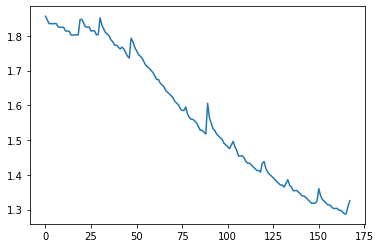

In [3099]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [3100]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [3101]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

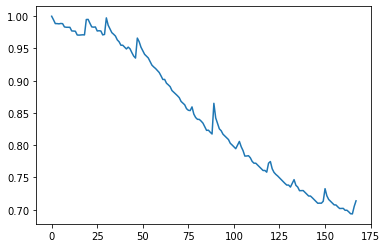

In [3102]:
plt.plot(range(len(soh)),soh)
plt.show()

In [3103]:
capacity=np.asarray(capacity)

In [3104]:
type(capacity)

numpy.ndarray

In [3105]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [3106]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [3107]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.3989
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1098
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0366
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0199
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0028


In [3108]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [3109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [3110]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 5ms/step


0.00013662392095992423

In [3111]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.012


In [3112]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01098148]
R2_score:  0.8184685159750653


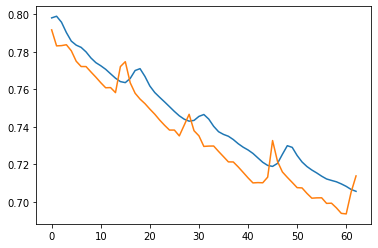

In [3113]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [3114]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [3115]:
preds

array([[0.96656746],
       [0.9649689 ],
       [0.9646988 ],
       [0.9644893 ],
       [0.9633416 ],
       [0.961431  ],
       [0.9601027 ],
       [0.9594504 ],
       [0.9581432 ],
       [0.9561355 ],
       [0.9544761 ],
       [0.95280564],
       [0.9506916 ],
       [0.9493769 ],
       [0.9492078 ],
       [0.95057005],
       [0.9559384 ],
       [0.9639092 ],
       [0.96752685],
       [0.96522605],
       [0.9618964 ],
       [0.9600143 ],
       [0.9584127 ],
       [0.9563666 ],
       [0.9547359 ],
       [0.95309603],
       [0.95244855],
       [0.9565245 ],
       [0.9624877 ],
       [0.9625884 ],
       [0.9577626 ],
       [0.9533115 ],
       [0.9499953 ],
       [0.94674826],
       [0.94304097],
       [0.9394038 ],
       [0.93651026],
       [0.93443376],
       [0.93272245],
       [0.9315743 ],
       [0.9308837 ],
       [0.92887   ],
       [0.9250163 ],
       [0.92271405],
       [0.92688054],
       [0.9350055 ],
       [0.93747675],
       [0.933

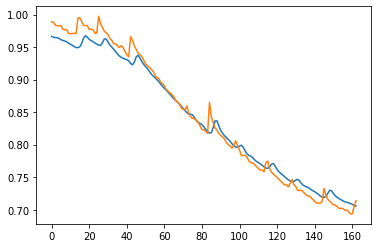

In [3116]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [3117]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [3118]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.0116
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2314
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1051
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1700
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0286
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0632
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0317
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0102


In [3119]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [3120]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.0002098603361679647

In [3121]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.014


In [3122]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01256667]
R2_score:  0.919095709149959


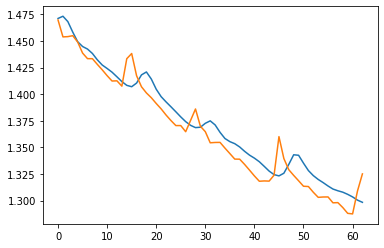

In [3123]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [3124]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [3125]:
preds

array([[1.7884712],
       [1.785078 ],
       [1.7842889],
       [1.7839522],
       [1.7820377],
       [1.7785678],
       [1.7759396],
       [1.7745454],
       [1.772323 ],
       [1.7686468],
       [1.7654662],
       [1.7623441],
       [1.7584559],
       [1.7558146],
       [1.7552155],
       [1.7574435],
       [1.7664653],
       [1.7811286],
       [1.7889649],
       [1.7860296],
       [1.7797242],
       [1.7758422],
       [1.7728503],
       [1.7690791],
       [1.7659521],
       [1.7628782],
       [1.7613748],
       [1.7678158],
       [1.778952 ],
       [1.7804424],
       [1.7725691],
       [1.7637807],
       [1.757382 ],
       [1.7513102],
       [1.7444514],
       [1.7376274],
       [1.731967 ],
       [1.7279578],
       [1.7246499],
       [1.7223684],
       [1.7210191],
       [1.717554 ],
       [1.7107435],
       [1.7059447],
       [1.7120929],
       [1.7269179],
       [1.7328974],
       [1.7262521],
       [1.715981 ],
       [1.7077141],


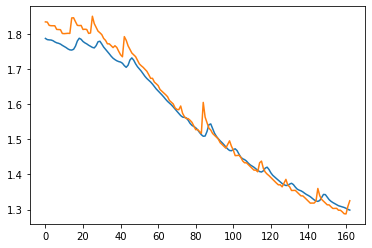

In [3126]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()